In [49]:
# Function to construct the hexagonal line tiling

def hexagonal_tiling_1k(k):
    G = Graph()
    for i in range(1, 2*k+1):
        G.add_edges([(i, i+1)])
        G.add_edges([(2*k+1+i, 2*k+2+i)])
        
    #G.add_edges([(4*k+2, 4*k+3)])        
    
    for j in range(1, 2*k+2,2):
        G.add_edges([(j, 2*k+j+1)])
        
    for i in range(1, 2*k+1):
        G.set_edge_label(i, i+1, f'a{i}')
        G.set_edge_label(2*k+1+i, 2*k+2+i, f'b{i}')
    
    for j in range(1, 2*k+2,2):
        G.set_edge_label(j, 2*k+j+1, f'c{(j+1)/2}')
        
    return G

# Function to construct the double hexagonal line tiling

def hexagonal_tiling_2k(k):
    G = Graph()
    for i in range(1, 2*k+1):
        G.add_edges([(i, i+1)])
        G.add_edges([(2*k+1+i, 2*k+2+i)])
        G.add_edges([(4*k+3+i, 4*k+4+i)])
        
    G.add_edges([(4*k+2, 4*k+3)])        
    
    for j in range(1, 2*k+2,2):
        G.add_edges([(j, 2*k+j+2)])
        G.add_edges([(2*k+j+1, 4*k+j+3)])
        
    for i in range(1, 2*k+1):
        G.set_edge_label(i, i+1, f'a{i}')
        G.set_edge_label(2*k+1+i, 2*k+2+i, f'b{i}')
        G.set_edge_label(4*k+3+i, 4*k+4+i, f'c{i}')
        
    G.set_edge_label(4*k+2, 4*k+3, f'b{2*k+1}')
    
    for j in range(1, 2*k+2,2):
        G.set_edge_label(j, 2*k+j+2, f'd{(j+1)/2}')
        G.set_edge_label(2*k+j+1, 4*k+j+3, f'e{(j+1)/2}')
        
    return G

# Function to construct the triple hexagonal line tiling

def hexagonal_tiling_3k(k):
    G = Graph()
    for i in range(1, 2*k+1):
        G.add_edges([(i, i+1)])
        G.add_edges([(2*k+1+i, 2*k+2+i)])
        G.add_edges([(4*k+3+i, 4*k+4+i)])
        G.add_edges([(6*k+5+i, 6*k+6+i)])
        
    G.add_edges([(4*k+2, 4*k+3)])        
    
    for j in range(1, 2*k+2,2):
        G.add_edges([(j, 2*k+j+2)])
        G.add_edges([(2*k+j+1, 4*k+j+4)])
        G.add_edges([(4*k+j+3, 6*k+j+5)])
        
    G.add_edges([(6*k+4, 6*k+5)])
        
    for i in range(1, 2*k+1):
        G.set_edge_label(i, i+1, f'a{i}')
        G.set_edge_label(2*k+1+i, 2*k+2+i, f'b{i}')
        G.set_edge_label(4*k+3+i, 4*k+4+i, f'c{i}')
        G.set_edge_label(6*k+5+i, 6*k+6+i, f'd{i}')
        
    G.set_edge_label(4*k+2, 4*k+3, f'b{2*k+1}')
    G.set_edge_label(6*k+4, 6*k+5, f'c{2*k+1}')
    
    for j in range(1, 2*k+2,2):
        G.set_edge_label(j, 2*k+j+2, f'e{(j+1)/2}')
        G.set_edge_label(2*k+j+1, 4*k+j+4, f'f{(j+1)/2}')
        G.set_edge_label(4*k+j+3, 6*k+j+5, f'g{(j+1)/2}')
        
    return G

In [2]:
from sage.graphs.independent_sets import IndependentSets
from sage.graphs.graph import Graph as SageGraph
from sage.topology.simplicial_complex import SimplicialComplex

def total_k_cc(G, k):
    V_G = set(G.vertices())  # Use a set for fast difference operations
    facets = []
    
    Ind_k = (x for x in IndependentSets(G) if len(x) == k)
    
    for ind_set_k in Ind_k:
        facets.append(tuple(V_G - set(ind_set_k)))
    
    return SimplicialComplex(facets)

def cutcomplex_k(G,k):
    V = G.vertices(sort=True)
    V_k = Set(V).subsets(k)
    facets = []
    H = []
    for s in V_k:
        if (G.subgraph(s)).is_connected() == 0:
            facets.append(Set(V) - s)
    X=SimplicialComplex(facets)
    return(X)

def faces(K):
    facets = K.facets()
    temp = []
    faces = []
    
    for f in facets:
        f_set = Set(f)
        temp.extend(f_set.subsets())
    
    for t in Set(temp):
        if len(t) == 1:
            x = tuple(t)
        else:
            x = (*t,)
        faces.append(x)
    
    return sorted(faces)

def deletion(K, s):
    Faces = faces(K)
    deletion_faces = []

    for f in Faces:
        if (s in f) == 0:
            deletion_faces.append(f)
            
    Deletion = SimplicialComplex(deletion_faces)

    return Deletion

In [ ]:
for i in range(2,8):
    G = hexagonal_tiling_1k(i)
    X = cutcomplex_k(G, 3)
    print(i, X.homology(base_ring = GF(2)))

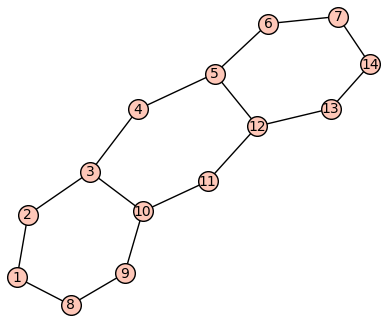

In [58]:
G = hexagonal_tiling_1k(3)
X = cutcomplex_k(G,3)
G.show()

In [59]:
sorted(X.facets())
X.is_shellable()

True

In [60]:
len(X.facets())

342

In [30]:
X = cutcomplex(G,3)
Y = total_k_cc(G,3)

In [31]:
I = IndependentSets(G, 3)
for s in I:
    print(s)

[(0, 0), (0, 2), (1, 1)]
[(0, 0), (1, 2)]
[(0, 1), (1, 0), (1, 2)]
[(0, 2), (1, 0)]


In [32]:
sorted(Y.facets())

[((0, 0), (1, 1), (0, 2)), ((0, 1), (1, 2), (1, 0))]

In [1]:
def hexagonal_tiling_1k(k):
    G = Graph()
    for i in range(1, 2*k+1):
        G.add_edges([(i, i+1)])
        G.add_edges([(2*k+1+i, 2*k+2+i)])
        
    return G

def octagonal_tiling_1k(k):
    G = Graph()
    for i in range(1, 3*k+1):
        G.add_edges([(i, i+1)])
        G.add_edges([(3*k+1+i, 3*k+2+i)])
    
    for j in range(1, 3*k+2,3):
        G.add_edges([(j, 3*k+j+1)])
        
    return G


def pentagonal_tiling_1k(k):
    G = Graph()
    for i in range(1, 4*k+1):
        G.add_edges([(i, i+1)])
        G.add_edges([(4*k+1+i, 4*k+2+i)])
    
    for j in range(1, 4*k+2,4):
        G.add_edges([(j, 4*k+j+1)])
        
    return G

In [22]:
G1 = hexagonal_tiling_1k(5)
X1 = cutcomplex_k(G1,2)

#X1.is_shellable()

len(X1.facets())

211

In [23]:
sorted(X1.facets())

[(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22),
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [25]:
X1.homology(base_ring = GF(2))

{0: Vector space of dimension 0 over Finite Field of size 2,
 1: Vector space of dimension 0 over Finite Field of size 2,
 2: Vector space of dimension 0 over Finite Field of size 2,
 3: Vector space of dimension 0 over Finite Field of size 2,
 4: Vector space of dimension 0 over Finite Field of size 2,
 5: Vector space of dimension 0 over Finite Field of size 2,
 6: Vector space of dimension 0 over Finite Field of size 2,
 7: Vector space of dimension 0 over Finite Field of size 2,
 8: Vector space of dimension 0 over Finite Field of size 2,
 9: Vector space of dimension 0 over Finite Field of size 2,
 10: Vector space of dimension 0 over Finite Field of size 2,
 11: Vector space of dimension 0 over Finite Field of size 2,
 12: Vector space of dimension 0 over Finite Field of size 2,
 13: Vector space of dimension 0 over Finite Field of size 2,
 14: Vector space of dimension 0 over Finite Field of size 2,
 15: Vector space of dimension 0 over Finite Field of size 2,
 16: Vector space 

In [18]:
X1.homology?

In [38]:
for j in range(2,6):
    G1 = hexagonal_tiling_1k(2)
    X1 = cutcomplex_k(G1,j)
    print(j, len(X1.facets()), X1.homology(base_ring = GF(2)))
    print(X1.is_shellable())

#X1.is_shellable()

#len(X1.facets()), sorted(X1.facets())

2 37 {0: Vector space of dimension 0 over Finite Field of size 2, 1: Vector space of dimension 0 over Finite Field of size 2, 2: Vector space of dimension 0 over Finite Field of size 2, 3: Vector space of dimension 0 over Finite Field of size 2, 4: Vector space of dimension 0 over Finite Field of size 2, 5: Vector space of dimension 0 over Finite Field of size 2, 6: Vector space of dimension 0 over Finite Field of size 2, 7: Vector space of dimension 1 over Finite Field of size 2}
True
3 114 {0: Vector space of dimension 0 over Finite Field of size 2, 1: Vector space of dimension 0 over Finite Field of size 2, 2: Vector space of dimension 0 over Finite Field of size 2, 3: Vector space of dimension 0 over Finite Field of size 2, 4: Vector space of dimension 0 over Finite Field of size 2, 5: Vector space of dimension 0 over Finite Field of size 2, 6: Vector space of dimension 30 over Finite Field of size 2}
True
4 206 {0: Vector space of dimension 0 over Finite Field of size 2, 1: Vector

In [40]:
for j in range(2,8):
    G1 = hexagonal_tiling_1k(3)
    X1 = cutcomplex_k(G1,j)
    print(j, len(X1.facets()), X1.homology(base_ring = GF(2)))
    #print(X1.is_shellable())

#X1.is_shellable()

#len(X1.facets()), sorted(X1.facets())

2 79 {0: Vector space of dimension 0 over Finite Field of size 2, 1: Vector space of dimension 0 over Finite Field of size 2, 2: Vector space of dimension 0 over Finite Field of size 2, 3: Vector space of dimension 0 over Finite Field of size 2, 4: Vector space of dimension 0 over Finite Field of size 2, 5: Vector space of dimension 0 over Finite Field of size 2, 6: Vector space of dimension 0 over Finite Field of size 2, 7: Vector space of dimension 0 over Finite Field of size 2, 8: Vector space of dimension 0 over Finite Field of size 2, 9: Vector space of dimension 0 over Finite Field of size 2, 10: Vector space of dimension 0 over Finite Field of size 2, 11: Vector space of dimension 1 over Finite Field of size 2}
3 354 {0: Vector space of dimension 0 over Finite Field of size 2, 1: Vector space of dimension 0 over Finite Field of size 2, 2: Vector space of dimension 0 over Finite Field of size 2, 3: Vector space of dimension 0 over Finite Field of size 2, 4: Vector space of dimens